In [1]:
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, precision_recall_curve, accuracy_score, zero_one_loss, balanced_accuracy_score, average_precision_score
from inspect import signature
import matplotlib.pyplot as plt
import numpy as np
import tensorflow
import os
import pickle
import sys
import logging
import seaborn as sns
from tensorflow.keras import backend
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE

### Validando Red VGG16 1000, 800, 400 HGT

In [50]:
model = load_model("/opt/datos/entrenamientos/larraondo/vgg16_val_0_2_6.h5")

In [51]:
x_test = np.load("/opt/datos/dataset/larraondo/x_test-0_2_6_validation.npy")
y_test = np.load("/opt/datos/dataset/larraondo/y_test-0_2_6_validation.npy")

print(x_test.shape)
print(y_test.shape)

(10805, 80, 120, 3)
(10805, 80, 120, 1)


In [ ]:
for i in range(10805):
    print("-----------------------------------------------------------------------")
    rain_pred = model.predict(x_test[i:i+1,:])
    rain = y_test[i:i+1,:]
    
    #TOTAL DE PRECIPITACION
    print("Total pred", np.sum(rain_pred))
    print("Total", np.sum(rain))
    
    #MEDIA PRECIPITACION
    print("Mean pred", np.sum(rain_pred) / float(rain.shape[1] * rain.shape[2]))
    print("Mean", np.sum(rain) / float(rain.shape[1] * rain.shape[2])) 
    
    # ERRORES
    mae = np.sum(rain_pred - rain)
    print("E", mae) 
    mae = np.sum(np.absolute(rain_pred - rain))
    print("AE", mae) 
    mae /= float(rain.shape[1] * rain.shape[2])
    print("MAE", mae) 
    print("-----------------------------------------------------------------------")

In [52]:
y_pred = model.predict(x_test)
print(y_pred.shape)

(10805, 80, 120, 1)


In [10]:
y_test = y_test.flatten()
print(y_test.shape)
y_pred = y_pred.flatten()
print(y_pred.shape)

(103728000,)
(103728000,)


In [11]:
## MEAN ABSOLUTE ERROR

MAE(y_test, y_pred)

0.27195457

In [13]:
##MEAN SQUARE ERROR

mse = MSE(y_test, y_pred)
print(f"MSE: {mse}")

MSE: 0.6010271906852722


In [14]:
## root mean square error

rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 0.7752594351768494


#### validando muestra predicha en mm

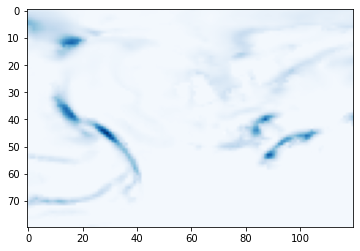

In [59]:
plt.imshow(y_test[2, :,:,0], cmap='Blues')

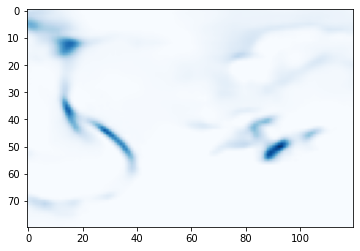

In [60]:
plt.imshow(y_pred[2, :,:,0], cmap='Blues')

### Validando Red VGG16 1000, 700, 500 HGT

In [15]:
model2 = load_model("/opt/datos/entrenamientos/larraondo/vgg16_0_3_5.h5")

In [16]:
x_test2 = np.load("/opt/datos/dataset/larraondo/x_test-0_3_5_levels.npy")
y_test2 = np.load("/opt/datos/dataset/larraondo/y_test-0_3_5_levels.npy")

print(x_test2.shape)
print(y_test2.shape)

(14023, 80, 120, 3)
(14023, 80, 120, 1)


In [17]:
y_pred2 = model2.predict(x_test2)
print(y_pred2.shape)

(14023, 80, 120, 1)


In [19]:
y_test2 = y_test2.flatten()
print(y_test2.shape)
y_pred2 = y_pred2.flatten()
print(y_pred2.shape)

(134620800,)
(134620800,)


In [20]:
## MEAN ABSOLUTE ERROR

MAE(y_test2, y_pred2)

0.2635415

In [21]:
##MEAN SQUARE ERROR

mse2 = MSE(y_test2, y_pred2)
print(f"MSE: {mse2}")

MSE: 0.568504810333252


In [22]:
## root mean square error

rmse2 = np.sqrt(mse2)
print(f"RMSE: {rmse2}")

RMSE: 0.7539925575256348


### Validando Red UNET 1000, 800, 400 HGT

In [3]:
model3 = load_model("/opt/datos/entrenamientos/larraondo/unet_val_0-2-6.h5")

In [4]:
x_test3 = np.load("/opt/datos/dataset/larraondo/x_test-0_2_6_validation.npy")
y_test3 = np.load("/opt/datos/dataset/larraondo/y_test-0_2_6_validation.npy")

print(x_test3.shape)
print(y_test3.shape)

(10805, 80, 120, 3)
(10805, 80, 120, 1)


In [6]:
y_pred3 = model3.predict(x_test3)
print(y_pred3.shape)

(10805, 80, 120, 1)


In [7]:
y_test3 = y_test3.flatten()
print(y_test3.shape)
y_pred3 = y_pred3.flatten()
print(y_pred3.shape)

(103728000,)
(103728000,)


In [8]:
## MEAN ABSOLUTE ERROR

MAE(y_test3, y_pred3)

0.23996514

In [9]:
##MEAN SQUARE ERROR

mse3 = MSE(y_test3, y_pred3)
print(f"MSE: {mse3}")

MSE: 0.48818767070770264


In [10]:
## root mean square error

rmse3 = np.sqrt(mse3)
print(f"RMSE: {rmse3}")

RMSE: 0.6987043023109436


### Prediccion con X_test GFS, Modelo Larraondo (VGG16 1000 - 700 - 500)

In [16]:
model4 = load_model("/opt/datos/entrenamientos/larraondo/vgg16_0_3_5.h5")

In [2]:
## X:
#X_test = np.load("/opt/datos/dataset/sin_normalizar/X_train.npy")
X_test = np.load("/opt/datos/dataset/sin_normalizar/X_test.npy")

print(X_test.shape)

## Y:
#Y_test = np.load("/opt/datos/dataset/milimetros/Y_test.npy")
Y_test = np.load("/opt/datos/dataset/milimetros/Y_test.npy")

print(Y_test.shape)

(1789, 3, 176, 176)
(1789, 176, 176)


In [3]:
# Muevo el eje RGB al ultimo

X_test = np.moveaxis(X_test, 1, 3)
print("X_test: %s" %str(X_test.shape))

Y_test = np.expand_dims(Y_test, axis=1)
Y_test = np.moveaxis(Y_test, 1, 3)
print("Y_test: %s" %str(Y_test.shape))

X_test: (1789, 176, 176, 3)
Y_test: (1789, 176, 176, 1)


In [4]:
X_test_input = X_test[:,0:80,0:120,:]
Y_test_input = Y_test[:,0:80,0:120,:]

In [5]:
print("X_test_input: %s" %str(X_test_input.shape))
print("Y_test_input: %s" %str(Y_test_input.shape))

X_test_input: (1789, 80, 120, 3)
Y_test_input: (1789, 80, 120, 1)


In [6]:
X_test_input = X_test_input*9.8

In [22]:
print(X_test_input.min())
print(X_test_input.max())
print(X_test_input.mean())

-858.3893661499025
58207.391894531254
29486.202350404947


In [23]:
Y_pred = model4.predict(X_test_input)
print(Y_pred.shape)

(11928, 80, 120, 1)


In [24]:
Y_test_input = Y_test_input.flatten()
print(Y_test_input.shape)
Y_pred = Y_pred.flatten()
print(Y_pred.shape)

(114508800,)
(114508800,)


In [25]:
## MEAN ABSOLUTE ERROR

MAE(Y_test_input, Y_pred)

0.1572197227185158

In [26]:
##MEAN SQUARE ERROR

mse4 = MSE(Y_test_input, Y_pred)
print(f"MSE: {mse4}")

MSE: 2.4508593067111346


In [27]:
## root mean square error

rmse4 = np.sqrt(mse4)
print(f"RMSE: {rmse4}")

RMSE: 1.5655220556450602


### Prediccion con Datasets concatenados (Unet 1000 - 700 - 500)

In [7]:
concatenado = load_model("/opt/datos/entrenamientos/unet_concatenado_0-3-5.h5")

In [8]:
## Se cargaron X_test e Y_test 
Y_pred = concatenado.predict(X_test_input)
print(Y_pred.shape)

(1789, 80, 120, 1)


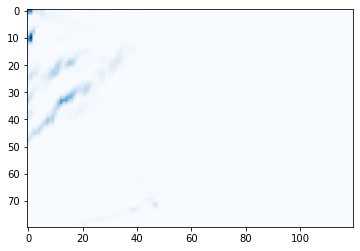

In [12]:
plt.imshow(Y_test_input[800, :,:,0], cmap='Blues')

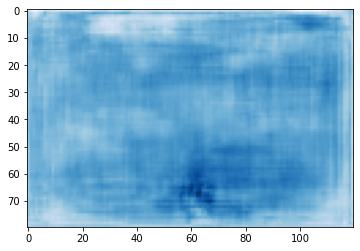

In [13]:
plt.imshow(Y_pred[800, :,:,0], cmap='Blues')

### Validando Red UNET - NUESTRA - 1000, 700, 500 HGT

In [16]:
from tensorflow.keras import backend
backend.set_image_data_format('channels_first')

In [17]:
model5 = load_model("/opt/datos/entrenamientos/unet_mm_No_normalized.h5")

In [18]:
## X:
X_test5 = np.load("/opt/datos/dataset/sin_normalizar/X_test.npy")

print(X_test5.shape)

## Y:
Y_test5 = np.load("/opt/datos/dataset/milimetros/Y_test.npy")

print(Y_test5.shape)

(1789, 3, 176, 176)
(1789, 176, 176)


In [19]:
Y_test5 = np.expand_dims(Y_test5, axis=1)
print(Y_test5.shape)

(1789, 1, 176, 176)


In [20]:
Y_pred5 = model5.predict(X_test5)
print(Y_pred5.shape)

(1789, 1, 176, 176)


In [8]:
Y_test5 = Y_test5.flatten()
print(Y_test5.shape)
Y_pred5 = Y_pred5.flatten()
print(Y_pred5.shape)

(55416064,)
(55416064,)


In [9]:
## MEAN ABSOLUTE ERROR

MAE(Y_test5, Y_pred5)

0.2006753503835172

In [10]:
##MEAN SQUARE ERROR

mse5 = MSE(Y_test5, Y_pred5)
print(f"MSE: {mse5}")

MSE: 2.7025892893926002


In [11]:
## root mean square error

rmse5 = np.sqrt(mse5)
print(f"RMSE: {rmse5}")

RMSE: 1.6439553793800488


#### validando muestra predicha en mm

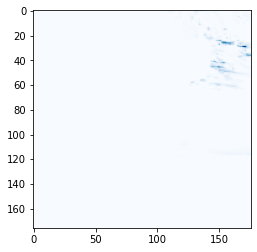

In [67]:
plt.imshow(Y_test5[190, 0,:,:], cmap='Blues')

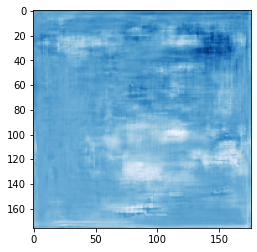

In [68]:
plt.imshow(Y_pred5[190, 0,:,:], cmap='Blues')

In [49]:
print(Y_test5[:, 0,:,:].max())
print(Y_pred5[:, 0,:,:].max())

print(Y_test5[:, 0,:,:].mean())
print(Y_pred5[:, 0,:,:].mean())

137.0980224609375
0.2616424
0.1964035143888125
0.0022257809


### Validando Red UNET - RECORTADA - 1000, 700, 500 HGT

In [2]:
model6 = load_model("/opt/datos/entrenamientos/unet_recorte_0-3-5.h5")

In [3]:
## X:
X_test6 = np.load("/opt/datos/dataset/sin_normalizar/X_test.npy")

print(X_test6.shape)

## Y:
Y_test6 = np.load("/opt/datos/dataset/milimetros/Y_test.npy")

print(Y_test6.shape)

(1789, 3, 176, 176)
(1789, 176, 176)


In [4]:
# Muevo el eje RGB al ultimo

X_test6 = np.moveaxis(X_test6, 1, 3)
print("X_test6: %s" %str(X_test6.shape))

Y_test6 = np.expand_dims(Y_test6, axis=1)
Y_test6 = np.moveaxis(Y_test6, 1, 3)
print("Y_test6: %s" %str(Y_test6.shape))

X_test6 = X_test6[:,0:80,0:120,:]
Y_test6 = Y_test6[:,0:80,0:120,:]

print("X_test6: %s" %str(X_test6.shape))
print("Y_test6: %s" %str(Y_test6.shape))

X_test6: (1789, 176, 176, 3)
Y_test6: (1789, 176, 176, 1)
X_test6: (1789, 80, 120, 3)
Y_test6: (1789, 80, 120, 1)


In [5]:
Y_pred6 = model6.predict(X_test6)
print(Y_pred6.shape)

(1789, 80, 120, 1)


In [6]:
Y_test6 = Y_test6.flatten()
print(Y_test6.shape)
Y_pred6 = Y_pred6.flatten()
print(Y_pred6.shape)

(17174400,)
(17174400,)


In [7]:
## MEAN ABSOLUTE ERROR

MAE(Y_test6, Y_pred6)

0.1652755404893831

In [8]:
##MEAN SQUARE ERROR

mse6 = MSE(Y_test6, Y_pred6)
print(f"MSE: {mse6}")

MSE: 2.1805188790654717


In [9]:
## root mean square error

rmse6 = np.sqrt(mse6)
print(f"RMSE: {rmse6}")

RMSE: 1.4766580101924316


### Graficos 

#### MAE

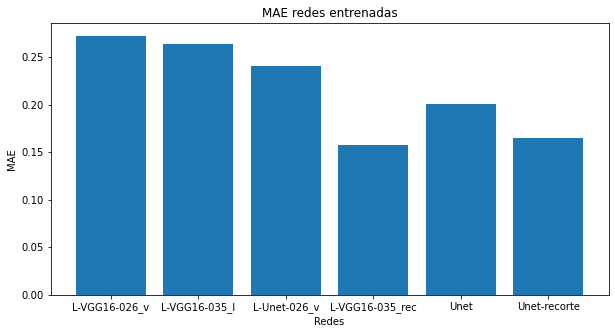

In [13]:
## L = modelo Larraondo
## Unet y Unet-recorte son modelos nuestros.
## [L-VGG16-0_2_6_validation, L-VGG16-0_3_5_levels, L-Unet-0_2_6_validation, L-VGG16-0_3_5_recorte, Unet, Unet-recorte]

MAE_graph = [0.27195457, 0.2635415, 0.23996514, 0.1572197227185158, 0.2006753503835172, 0.1652755404893831]
labels    = ['L-VGG16-026_v', 'L-VGG16-035_l', 'L-Unet-026_v', 'L-VGG16-035_rec', 'Unet', 'Unet-recorte']
plt.figure(figsize=(10,5))
plt.bar(labels, MAE_graph)

plt.title('MAE redes entrenadas')
## Legenda en el eje y
plt.ylabel('MAE')

## Legenda en el eje x
plt.xlabel('Redes')
plt.show()

#### MSE

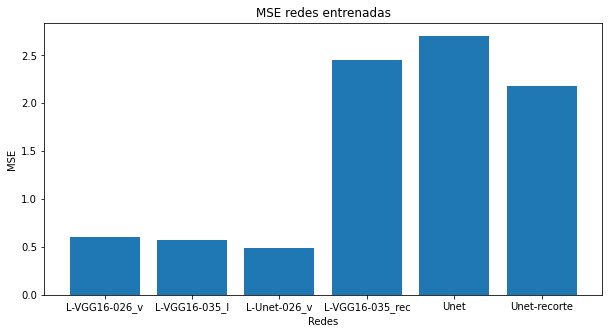

In [14]:
## L = modelo Larraondo
## Unet y Unet-recorte son modelos nuestros.
## [L-VGG16-0_2_6_validation, L-VGG16-0_3_5_levels, L-Unet-0_2_6_validation, L-VGG16-0_3_5_recorte, Unet, Unet-recorte]

MSE_graph = [0.6010271906852722, 0.568504810333252, 0.48818767070770264, 2.4508593067111346, 2.7025892893926002, 2.1805188790654717]
labels    = ['L-VGG16-026_v', 'L-VGG16-035_l', 'L-Unet-026_v', 'L-VGG16-035_rec', 'Unet', 'Unet-recorte']
plt.figure(figsize=(10,5))
plt.bar(labels, MSE_graph)

plt.title('MSE redes entrenadas')
## Legenda en el eje y
plt.ylabel('MSE')

## Legenda en el eje x
plt.xlabel('Redes')
plt.show()

#### RMSE

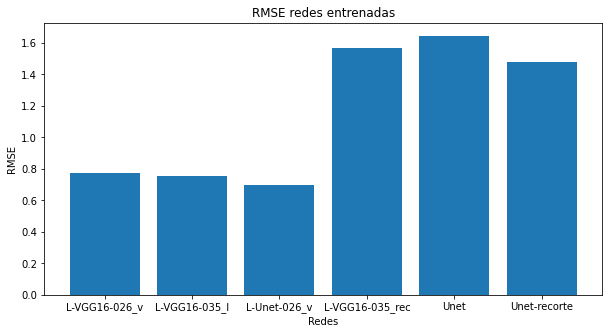

In [15]:
## L = modelo Larraondo
## Unet y Unet-recorte son modelos nuestros.
## [L-VGG16-0_2_6_validation, L-VGG16-0_3_5_levels, L-Unet-0_2_6_validation, L-VGG16-0_3_5_recorte, Unet, Unet-recorte]

#MSE_graph = [0.6010271906852722, 0.568504810333252, 0.48818767070770264, 2.4508593067111346, 2.7025892893926002, 2.1805188790654717]
RMSE_graph = np.sqrt(MSE_graph)
labels    = ['L-VGG16-026_v', 'L-VGG16-035_l', 'L-Unet-026_v', 'L-VGG16-035_rec', 'Unet', 'Unet-recorte']
plt.figure(figsize=(10,5))
plt.bar(labels, RMSE_graph)

plt.title('RMSE redes entrenadas')
## Legenda en el eje y
plt.ylabel('RMSE')

## Legenda en el eje x
plt.xlabel('Redes')
plt.show()